# HW 2

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import os
from torch import nn
from tqdm import tqdm

In [17]:
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ]
)

In [18]:
def seed_everything(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [28]:
seed_everything(42)

mnist_train = torchvision.datasets.MNIST(
    './mnist/',
    train=True,
    download=True,
    transform=transform
)

mnist_val = torchvision.datasets.MNIST(
    './mnist/',
    train=False,
    download=True,
    transform=transform
)

train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(mnist_val, batch_size=64, shuffle=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:02<00:00, 662kB/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 1.05MB/s]


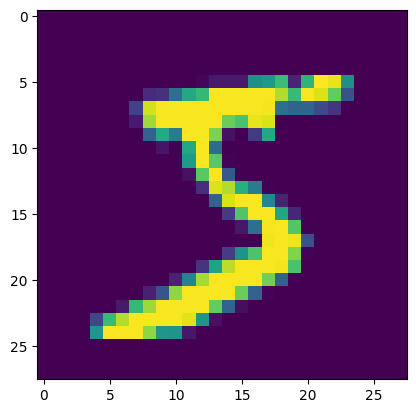

In [29]:
plt.imshow(mnist_train[0][0].squeeze(0).numpy().reshape([28, 28]))

In [30]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [47]:
def train(model, optimizer, n_epochs=5):
    for epoch in range(n_epochs):

        # обучение
        for x_train, y_train in tqdm(train_dataloader):
            y_onehot = F.one_hot(y_train, num_classes=10).float()
            y_pred = F.softmax(model(x_train), dim=1)
            loss = torch.nn.MSELoss()(y_pred, y_onehot)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # валидация
        if epoch % 2 == 0:
            val_loss = []
            val_accuracy = []
            with torch.no_grad():
                for x_val, y_val in tqdm(val_dataloader):
                    y_onehot = F.one_hot(y_val, num_classes=10).float()
                    y_pred = F.softmax(model(x_val), dim=1)
                    loss = torch.nn.MSELoss()(y_pred, y_onehot)
                    val_loss.append(loss.numpy())
                    val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())

            print(f'Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}')

In [48]:
train(model, optimizer)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 90.89it/s]


Epoch: 0, loss: 0.002815026557072997, accuracy: 0.9817


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 91.19it/s]


Epoch: 2, loss: 0.00284666009247303, accuracy: 0.9816


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 90.59it/s]

Epoch: 4, loss: 0.003339465707540512, accuracy: 0.978


In [49]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),  # grayscale
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),   # сократим изображение в 4 раза по каждой из сторон
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [50]:
train(model, optimizer)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 72.83it/s]


Epoch: 0, loss: 0.004356592893600464, accuracy: 0.9719


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 76.92it/s]


Epoch: 2, loss: 0.002654194599017501, accuracy: 0.9827


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 68.78it/s]

Epoch: 4, loss: 0.002233042847365141, accuracy: 0.9854


In [51]:
0.9854 # Для сокращения в 4 раза

0.9854

In [58]:
0.985 # Для сокращения в 6 раз

0.985

In [61]:
0.9836 # Для сокращения в 2 раза

0.9836

In [68]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=12, kernel_size=5),  # grayscale
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),   # сократим изображение в 4 раза по каждой из сторон
    nn.Flatten(),
    nn.Linear(6*6*12, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [69]:
train(model, optimizer)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 69.88it/s]


Epoch: 0, loss: 0.004371624905616045, accuracy: 0.9726


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 71.43it/s]


Epoch: 2, loss: 0.003570354776456952, accuracy: 0.9763


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 71.88it/s]

Epoch: 4, loss: 0.0025244352873414755, accuracy: 0.9832


In [74]:
0.9832 # Для out_channels=12

0.9832

In [76]:
0.9854 # Для out_channels=10

0.9854

In [77]:
0.9826 # Для out_channels=8

0.9826

In [78]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=4),  # grayscale
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=5),   # сократим изображение в 5 раз по каждой из сторон
    nn.Flatten(),
    nn.Linear(5*5*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [79]:
train(model, optimizer)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 59.29it/s]


Epoch: 0, loss: 0.005020000506192446, accuracy: 0.9683


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 61.40it/s]


Epoch: 2, loss: 0.0029602719005197287, accuracy: 0.9804


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.38it/s]

Epoch: 4, loss: 0.003244672669097781, accuracy: 0.9778


In [ ]:
0.9778 # Для kernel_size=4

In [81]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=8),  # grayscale
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),   # сократим изображение в 4 разa по каждой из сторон
    nn.Flatten(),
    nn.Linear(5*5*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [82]:
train(model, optimizer)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.21it/s]


Epoch: 0, loss: 0.004634436219930649, accuracy: 0.9699


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.65it/s]


Epoch: 2, loss: 0.0024389990139752626, accuracy: 0.9839


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 60.92it/s]

Epoch: 4, loss: 0.0020908399019390345, accuracy: 0.9871


In [ ]:
0.9871 # Для kernel_size=8 и сокращения в 4 раза - лучший результат

In [ ]:
0.9776 # Для Для kernel_size=8 и сокращения в 5 раз

In [89]:
print("Лучший результат - 0.9871 был достигнут при out_channels=10, kernel_size=8 и сокращении в 4 раза")

Лучший результат - 0.9871 был достигнут при out_channels=10, kernel_size=8 и сокращении в 4 раза
